# CVPR Project - Gianduja templates

## Multi Model Fitting images

Iva Ilcheva<br>
Reinard Lazuardi Kuwandy

In [1]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np
import random
import math
from scipy import spatial
%matplotlib inline

IMG_TARGET = 'img/target-chocolates.jpg'
IMG_TEMPLATE = [
    'img/au-lait.jpg',
    'img/choco-noisettes.jpg', 
    'img/cremant.jpg',
    'img/gianduja.png',
    'img/noir-amarante.jpg',
    'img/noir-coco.jpg',
    'img/noir-gingembre.jpg', 
    'img/noir-orange.jpg'
]

### Helper Functions

In [2]:
from utils import *

### Implementation

## Gianduja

In [3]:
img_target, img_template3 = read_images(IMG_TARGET, IMG_TEMPLATE[3])

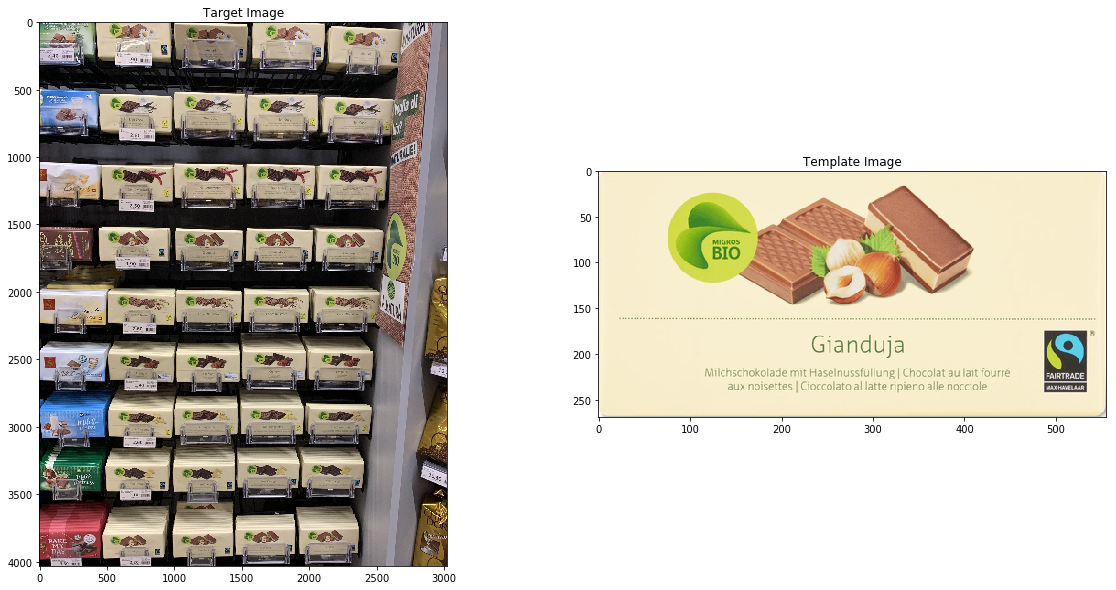

In [4]:
plot_images(img_target, img_template3)

In [5]:
keypoints_target, descriptors_target, keypoints_template3, descriptors_template3 = sift_keypoints_and_descriptors(img_target, img_template3)

In [6]:
plot_best_matches3, best_matches3 = get_best_matches(descriptors_target, descriptors_template3, ratio=0.45)

In [10]:
correspondences3 = get_correspondences(best_matches3, keypoints_target, keypoints_template3)

In [11]:
models3 = sequential_msac(correspondences3, 15, 4,99,5000, 3)

304
285
265
248
231
218
206
195
185
174
165
156
148
139
132
125
117
111
105
99
94
89
84
79
74
70
66
62
57
52
48
44
40
36
32
28
24
20
16
12
8
4


In [12]:
models3

[[array([[ 1.29349541e+00, -2.59982776e-01,  1.52687310e+03],
         [ 3.58498209e-01,  7.31168394e-01,  1.53117166e+03],
         [ 2.11520543e-04, -1.13733737e-04,  1.00000000e+00]]),
  [[161.38014221191406, 66.91333770751953, 1673.8232421875, 1595.627197265625],
   [161.38014221191406, 66.91333770751953, 1673.8232421875, 1595.627197265625],
   [216.6989288330078, 51.3793830871582, 1724.69140625, 1582.7459716796875],
   [244.2633819580078,
    80.72644805908203,
    1746.9910888671875,
    1609.382080078125],
   [246.07257080078125,
    107.79032135009766,
    1747.60595703125,
    1633.2154541015625],
   [250.30252075195312,
    109.70683288574219,
    1751.8875732421875,
    1634.4166259765625],
   [275.7056884765625,
    100.25106811523438,
    1773.3057861328125,
    1626.47802734375],
   [275.7056884765625,
    100.25106811523438,
    1773.3057861328125,
    1626.47802734375],
   [289.8429870605469, 102.1092758178711, 1786.1083984375, 1628.949462890625],
   [289.346923828125,


In [13]:
img_target, img_template3 = read_images(IMG_TARGET, IMG_TEMPLATE[3])

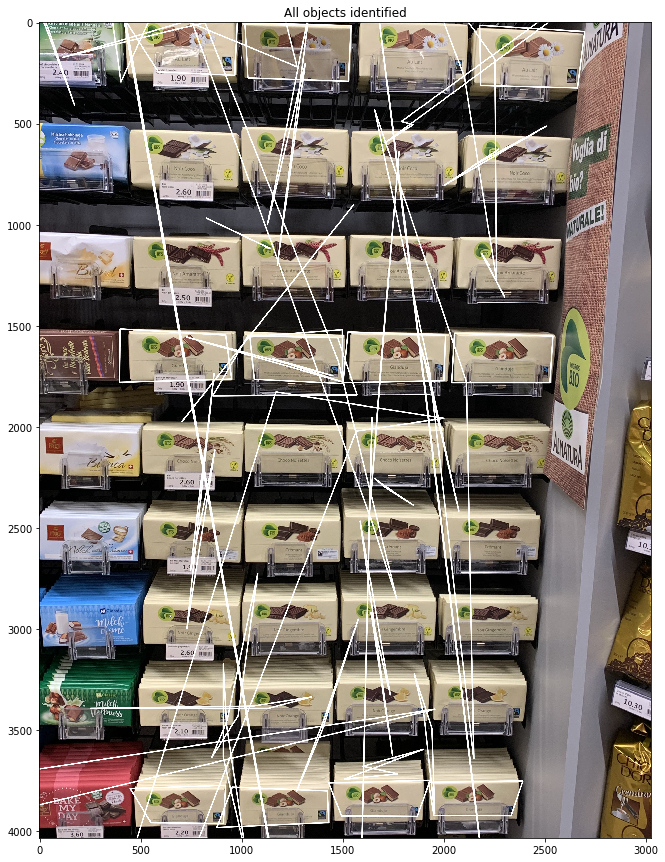

In [14]:
draw_bounding_boxes(img_target, img_template3, models3, 1, isPostJLinkage=False)

In [15]:
PS3 = get_preference_sets(correspondences3, models3)

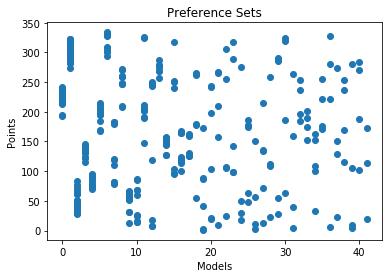

In [16]:
plot_scatter(PS3)

In [17]:
cl3 = j_linkage(PS3)

/Users/reinardlazuardikuwandy/Documents/USI/Semester 4/CVPR/Project/utils.py:339: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - (np.double(np.bitwise_and(point_1, point_2).sum()) / get_union(point_1, point_2).sum())


In [18]:
cl3

[[array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0.]), 0, 192],
 [array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0.]), 1, 2, 41, 87, 89, 172],
 [array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0.]), 3, 11, 56, 150],
 [array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 1., 0., 0.]), 4, 10, 105, 280],
 [array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.

In [19]:
mod3 = remove_pref_set(cl3)

In [20]:
mod3 = get_model(cl3,correspondences3)

In [21]:
new_mod3 = delete_small_model(mod3, 4)

In [25]:
img_target, img_template3 = read_images(IMG_TARGET, IMG_TEMPLATE[3])

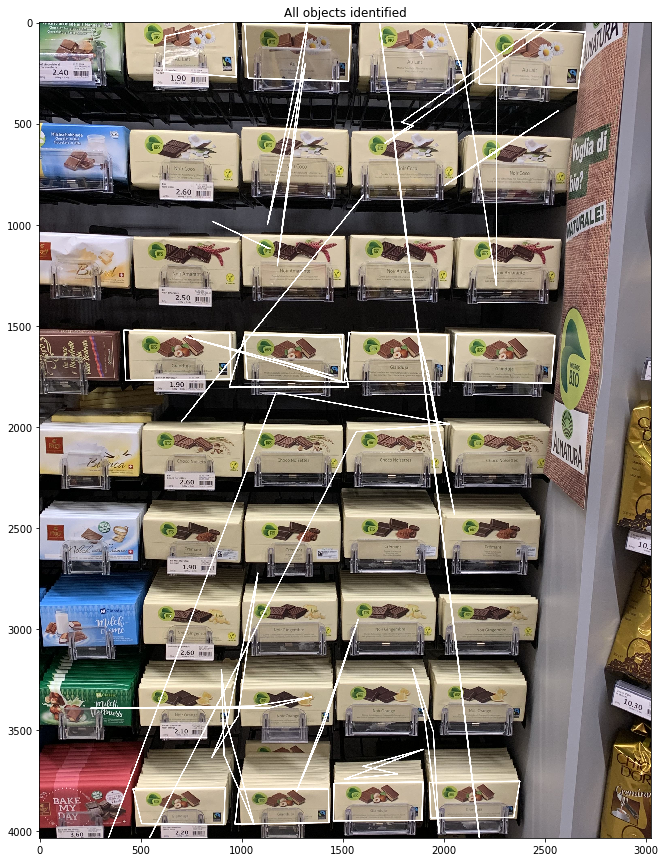

In [26]:
draw_bounding_boxes(img_target, img_template3, new_mod3, 1, True)

In [31]:
def niceHomography(H):
    det = H[0][0] * H[1][1] - H[1][0] * H[0][1]
    print("det: {}".format(det))
    if det < 0:
        return False
    
    N1 = math.sqrt(H[0][0] * H[0][0] + H[1][0] * H[1][0])
    print("N1: {}".format(N1))
    if N1 > 4 or N1 < 0.1:
        return False
    
    N2 = math.sqrt(H[0][1] * H[0][1] + H[1][1] * H[1][1])
    print("N2: {}".format(N2))
    if N2 > 4 or N2 < 0.1:
        return False

    N3 = math.sqrt(H[2] [0] * H[2] [0] + H[2] [1] * H[2] [1])
    print("N3: {}".format(N3))
    if N3 > 0.002:
        return False

    return True 

In [32]:
'''
    Function to remove unfit clusters based on 
    comparison of mean diameter of all clusters and diameter inside of 
    particular cluster.
'''
from statistics import median
def remove_far_distances_clusters2(clusters_, new_models_):
    list_candidates = []
    new_test_model = []
    list_dist_per_cluster = []
    mean_distance = 0
    
    ## Calculate the mean diameter of all cluters 
    ## (Idea: the matching points in target image shouldn't be far away from each other for each cluster)
    all_diameter_cluster = [diameter(clusters_[i]) for i in range(len(clusters_))]
    AVG = sum(all_diameter_cluster) / len(all_diameter_cluster)
    MEDIAN = median(all_diameter_cluster)
    
    for k,cluster_ in enumerate(clusters_):
        candidates = cluster_[spatial.ConvexHull(cluster_).vertices]
        dist_mat = spatial.distance_matrix(candidates, candidates)
    
        # get indices of candidates that are furthest apart
        i, j = np.unravel_index(dist_mat.argmax(), dist_mat.shape)

        dist = math.sqrt((candidates[j][0]-candidates[i][0])**2 + (candidates[j][1]-candidates[i][1])**2)
        list_dist_per_cluster.append(dist)
    
    for k, each_cluster_dist in enumerate(list_dist_per_cluster):
        if each_cluster_dist <= MEDIAN or each_cluster_dist <= AVG:
            
            ## Check if the homography is good
            H,_ = estimate_homography(np.vstack(new_models_[k]))
            if niceHomography(H):
                new_test_model.append(new_models_[k])
            
            
    return new_test_model

In [35]:
clusters_3, clusters_size_list3 = define_clusters(new_mod3)
clusters_size3 = len(clusters_3)
print("Previous dunn index of the cluster : {}".format(dunn_index(clusters_size_list3, clusters_3)))

new_test_model3 = remove_far_distances_clusters2(clusters_3, new_mod3)

print("Num of clusters previously: {}".format(len(new_mod3)))

clusters_new3, clusters_size_list_new3 = define_clusters(new_test_model3)
clusters_new3, a_model = merge_cluster(clusters_new3, new_test_model3)
clusters_new3, clusters_size_list_new3 = define_clusters(new_test_model3)

print("Num of clusters currently: {}".format(len(new_test_model3)))
print("Current dunn index of the cluster : {}".format(dunn_index(clusters_size_list_new3, clusters_new3)))

Previous dunn index of the cluster : 0.0013188051210836626
det: 1.9474790303391227
N1: 0.8734262745759216
N2: 2.5179485003724817
N3: 0.0004855271853271692
det: 19.387599439164035
N1: 4.539146477712091
det: 1.0373637235296087
N1: 1.1176207544945802
N2: 0.9662710936142478
N3: 0.0001532540557143613
det: 38.00612827289606
N1: 1.10833560381143
N2: 34.69073972711874
det: -0.041919637260496745
det: 40.19560285667396
N1: 8.553627439693829
det: 0.9892456147588983
N1: 0.9292006090343454
N2: 1.1085859119573611
N3: 0.00020632034622196794
det: -0.2966981296976673
det: 0.8417309355846215
N1: 0.7288449755684973
N2: 1.156049614266777
N3: 0.00021042974795628592
det: 0.045383762763063676
N1: 0.9859410689486757
N2: 0.2362939100464869
N3: 0.00019363763889416986
det: 0.4984671390635924
N1: 0.733019198564985
N2: 0.7015946472436163
N3: 4.102022444338275e-05
det: 0.7067205081827239
N1: 1.0619434321550008
N2: 0.7003862072768688
N3: 0.00017586557930677116
det: 1.5484198373164582
N1: 0.7391538031211656
N2: 2.115

In [36]:
img_target, img_template3 = read_images(IMG_TARGET, IMG_TEMPLATE[3])

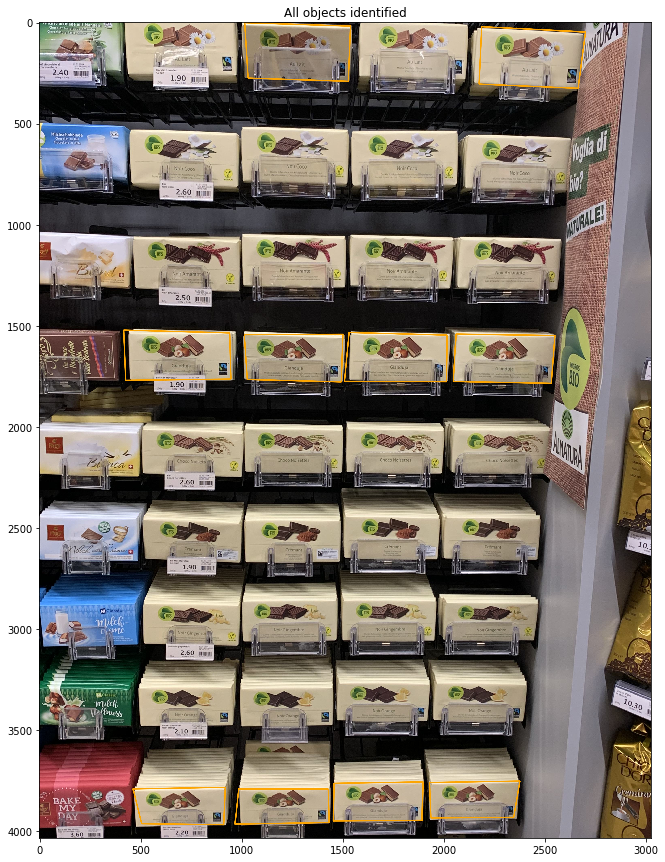

In [37]:
draw_bounding_boxes(img_target, img_template3, a_model, 1, True, color=(3, 165, 252))

### Test 2

In [4]:
img_target, img_template3 = read_images(IMG_TARGET, IMG_TEMPLATE[3])

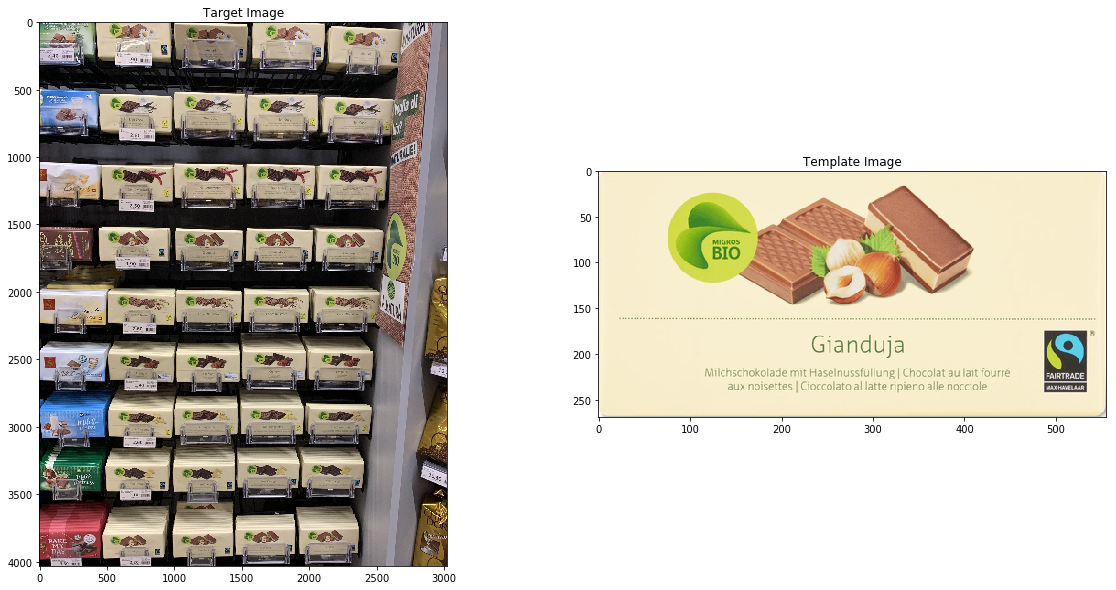

In [78]:
plot_images(img_target, img_template3)

In [79]:
keypoints_target, descriptors_target, keypoints_template3, descriptors_template3 = sift_keypoints_and_descriptors(img_target, img_template3)

In [80]:
plot_best_matches3, best_matches3 = get_best_matches(descriptors_target, descriptors_template3, ratio=0.45)

In [81]:
correspondences3 = get_correspondences(best_matches3, keypoints_target, keypoints_template3)

In [82]:
models3 = sequential_msac(correspondences3, 15, 4,99,5000, 5)

312
287
272
248
235
216
205
194
183
173
162
151
143
135
128
121
114
108
102
96
91
85
79
75
71
66
61
56
51
46
41
36
31
27
23
19
15
11
7
3


In [83]:
models3

[[array([[ 1.57879870e+00, -2.85779078e-01,  3.83553004e+02],
         [ 1.10976575e+00,  3.27384974e-01,  1.50854881e+03],
         [ 6.67363026e-04, -4.24636244e-04,  1.00000000e+00]]),
  [[275.7056884765625, 100.25106811523438, 691.4638671875, 1618.51318359375],
   [284.2748718261719, 124.357421875, 701.6035766601562, 1640.08740234375],
   [289.346923828125, 45.5410041809082, 705.9560546875, 1571.889892578125],
   [289.8429870605469, 102.1092758178711, 706.5244140625, 1620.56689453125],
   [292.1160888671875, 63.219398498535156, 707.7109375, 1586.69873046875],
   [293.1480407714844,
    77.88561248779297,
    708.6553955078125,
    1599.5240478515625],
   [291.3751220703125,
    133.6256561279297,
    708.8899536132812,
    1648.9783935546875],
   [294.51641845703125,
    69.02727508544922,
    709.5240478515625,
    1590.8204345703125],
   [294.071044921875,
    85.92235565185547,
    709.6268920898438,
    1606.2938232421875],
   [297.1146545410156, 40.52965545654297, 711.36572265

In [84]:
img_target, img_template3 = read_images(IMG_TARGET, IMG_TEMPLATE[3])

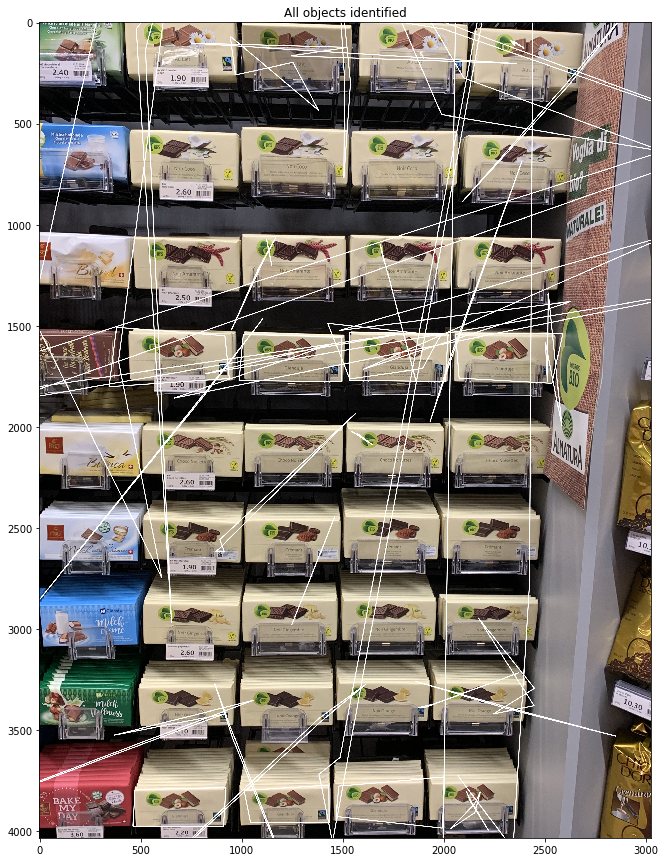

In [85]:
draw_bounding_boxes(img_target, img_template3, models3, 1, isPostJLinkage=False)

In [86]:
PS3 = get_preference_sets(correspondences3, models3)

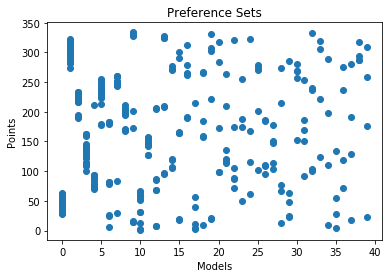

In [87]:
plot_scatter(PS3)

In [88]:
cl3 = j_linkage(PS3)

In [90]:
len(cl3)

41

In [92]:
cl3

[[array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0.]), 0, 153, 197],
 [array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0.]), 1, 2, 13, 31, 32, 52, 53, 58, 59, 65, 66],
 [array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0.]), 3, 5, 11, 40, 57, 215],
 [array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 1., 0., 0., 0., 0.]), 4, 28, 55, 134],
 [array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 

In [93]:
mod3 = remove_pref_set(cl3)

In [94]:
mod3 = get_model(cl3,correspondences3)

In [95]:
new_mod3 = delete_small_model(mod3, 4)

In [96]:
clusters_3, clusters_size_list3 = define_clusters(new_mod3)
clusters_size3 = len(clusters_3)
print("Previous dunn index of the cluster : {}".format(dunn_index(clusters_size_list3, clusters_3)))

new_test_model3 = remove_far_distances_clusters(clusters_3, new_mod3,100)

print("Num of clusters previously: {}".format(len(new_mod3)))

clusters_new3, clusters_size_list_new3 = define_clusters(new_test_model3)
clusters_new3, new_test_model3 = merge_cluster(clusters_new3, new_test_model3)
clusters_new3, clusters_size_list_new3 = define_clusters(new_test_model3)

print("Num of clusters currently: {}".format(len(new_test_model3)))
print("Current dunn index of the cluster : {}".format(dunn_index(clusters_size_list_new3, clusters_new3)))

Previous dunn index of the cluster : 0.0012631900528802973
det: 0.4345203213004382
N1: 0.8233407955810012
N2: 0.5279965366283803
N3: 4.615099012236666e-05
det: -0.30919908463660306
det: 71.05983830837624
N1: 12.45369068567266
det: 0.9751920154905291
N1: 1.0277544427869683
N2: 0.9679487296402208
N3: 9.533628065095131e-05
det: -109.46025545622933
det: 4.3130819682128845
N1: 4.7848422785058515
det: 7.648161355186943
N1: 5.481425997224581
det: 24.52968255350413
N1: 13.335706497251651
det: 0.9537503973338296
N1: 0.8994565103157294
N2: 1.0765536241175286
N3: 0.0001290371778238925
det: 195.8803943653918
N1: 41.35980174581591
det: -1.1666616896668507
det: 1.045325794240427
N1: 0.8745390345030497
N2: 1.5823299394916974
N3: 0.0002945312418340149
det: 2.0840766484040745
N1: 0.9286144377128868
N2: 2.5395984641579523
N3: 0.00044818222212511896
det: 0.7713623944575138
N1: 0.8834636815995109
N2: 0.8733343478379622
N3: 4.903316056178335e-06
det: 1.592733765412141
N1: 0.7164430870092997
N2: 2.317689445

In [97]:
img_target, img_template3 = read_images(IMG_TARGET, IMG_TEMPLATE[3])

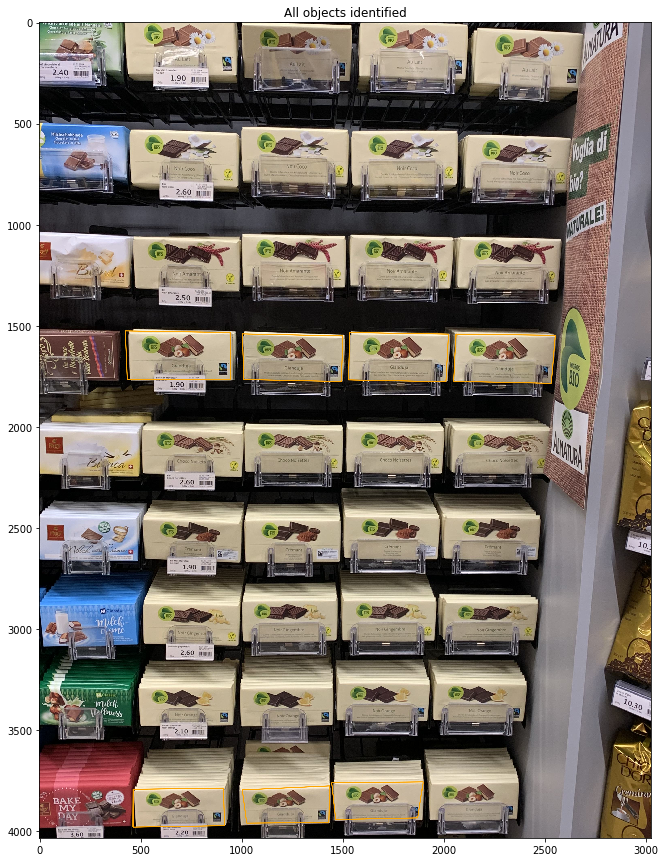

In [98]:
draw_bounding_boxes(img_target, img_template3, new_test_model3, 1, True, color=(3, 165, 252))